In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the Dataset

In [17]:
df = pd.read_csv('sample_dataset.csv')
print("Dataset Loaded:")
print(df)

Dataset Loaded:
    ID     Name   Age   Salary Department JoiningDate
0    1    Alice  28.0  50000.0         IT   6/23/2019
1    2      Bob  35.0      NaN         HR   8/14/2018
2    3  Charlie  45.0  75000.0    Finance   1/10/2020
3    4    Diana   NaN  65000.0  Marketing  11/30/2017
4    5      Eve  29.0  80000.0         IT   5/21/2021
5    6    Frank  33.0  45000.0    Finance         NaN
6    7    Grace  38.0  54000.0         HR   6/11/2018
7    8     Hank  31.0  62000.0         IT   12/2/2019
8    9      Ivy  27.0  68000.0  Marketing   4/25/2020
9   10     Jack  42.0      NaN         HR   7/17/2016
10   1    Alice  28.0  50000.0         IT   6/23/2019


# Handle missing values using mean/mode imputation


In [18]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:", numerical_cols)

Numerical columns: Index(['ID', 'Age', 'Salary'], dtype='object')


In [19]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

Categorical columns: Index(['Name', 'Department', 'JoiningDate'], dtype='object')


In [20]:
for col in numerical_cols:
    print(f"Filling missing values in {col} with mean value: {df[col].mean()}")
    df[col] = df[col].fillna(df[col].mean())

Filling missing values in ID with mean value: 5.090909090909091
Filling missing values in Age with mean value: 33.6
Filling missing values in Salary with mean value: 61000.0


In [21]:
for col in categorical_cols:
    print(f"Filling missing values in {col} with mode value: {df[col].mode()[0]}")
    df[col] = df[col].fillna(df[col].mode()[0])

Filling missing values in Name with mode value: Alice
Filling missing values in Department with mode value: IT
Filling missing values in JoiningDate with mode value: 6/23/2019


In [22]:
print("Dataframe after handling missing values:")
print(df)

Dataframe after handling missing values:
    ID     Name   Age   Salary Department JoiningDate
0    1    Alice  28.0  50000.0         IT   6/23/2019
1    2      Bob  35.0  61000.0         HR   8/14/2018
2    3  Charlie  45.0  75000.0    Finance   1/10/2020
3    4    Diana  33.6  65000.0  Marketing  11/30/2017
4    5      Eve  29.0  80000.0         IT   5/21/2021
5    6    Frank  33.0  45000.0    Finance   6/23/2019
6    7    Grace  38.0  54000.0         HR   6/11/2018
7    8     Hank  31.0  62000.0         IT   12/2/2019
8    9      Ivy  27.0  68000.0  Marketing   4/25/2020
9   10     Jack  42.0  61000.0         HR   7/17/2016
10   1    Alice  28.0  50000.0         IT   6/23/2019


# Remove duplicates 

In [23]:
df.drop_duplicates(inplace=True)
print(df)

   ID     Name   Age   Salary Department JoiningDate
0   1    Alice  28.0  50000.0         IT   6/23/2019
1   2      Bob  35.0  61000.0         HR   8/14/2018
2   3  Charlie  45.0  75000.0    Finance   1/10/2020
3   4    Diana  33.6  65000.0  Marketing  11/30/2017
4   5      Eve  29.0  80000.0         IT   5/21/2021
5   6    Frank  33.0  45000.0    Finance   6/23/2019
6   7    Grace  38.0  54000.0         HR   6/11/2018
7   8     Hank  31.0  62000.0         IT   12/2/2019
8   9      Ivy  27.0  68000.0  Marketing   4/25/2020
9  10     Jack  42.0  61000.0         HR   7/17/2016


# handle outliers

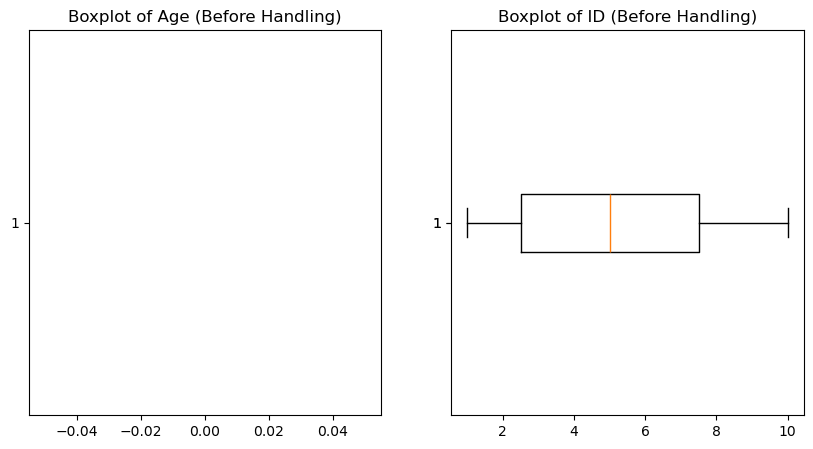

In [24]:
df = pd.read_csv('sample_dataset.csv')


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.boxplot(df['Age'], vert=False)
plt.title("Boxplot of Age (Before Handling)")

plt.subplot(1, 2, 2)
plt.boxplot(df['Salary'], vert=False)
plt.title("Boxplot of Salary (Before Handling)")

plt.subplot(1, 2, 2)
plt.boxplot(df['ID'], vert=False)
plt.title("Boxplot of ID (Before Handling)")

plt.show()

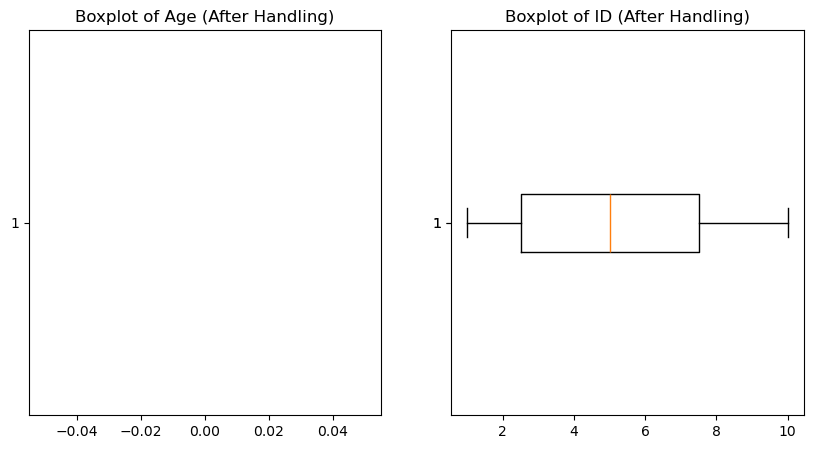

In [25]:
numerical_cols = ['ID','Age', 'Salary']

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.boxplot(df['Age'], vert=False)
plt.title("Boxplot of Age (After Handling)")

plt.subplot(1, 2, 2)
plt.boxplot(df['Salary'], vert=False)
plt.title("Boxplot of Salary (After Handling)")
plt.subplot(1, 2, 2)
plt.boxplot(df['ID'], vert=False)
plt.title("Boxplot of ID (After Handling)")


plt.show()

# Convert categorical data into numerical form 

In [26]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print(df)

    ID   Age   Salary  Name_Bob  Name_Charlie  Name_Diana  Name_Eve  \
0    1  28.0  50000.0     False         False       False     False   
1    2  35.0      NaN      True         False       False     False   
2    3  45.0  75000.0     False          True       False     False   
3    4   NaN  65000.0     False         False        True     False   
4    5  29.0  80000.0     False         False       False      True   
5    6  33.0  45000.0     False         False       False     False   
6    7  38.0  54000.0     False         False       False     False   
7    8  31.0  62000.0     False         False       False     False   
8    9  27.0  68000.0     False         False       False     False   
9   10  42.0      NaN     False         False       False     False   
10   1  28.0  50000.0     False         False       False     False   

    Name_Frank  Name_Grace  Name_Hank  ...  Department_IT  \
0        False       False      False  ...           True   
1        False       Fals

# Normalize and standardize numerical features.

In [27]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print("Processed DataFrame:")
print(df)

Processed DataFrame:
          ID       Age    Salary  Name_Bob  Name_Charlie  Name_Diana  \
0  -1.350676 -0.938035 -0.964764     False         False       False   
1  -1.020510  0.234509       NaN      True         False       False   
2  -0.690345  1.909572  1.227881     False          True       False   
3  -0.360180       NaN  0.350823     False         False        True   
4  -0.030015 -0.770529  1.666410     False         False       False   
5   0.300150 -0.100504 -1.403293     False         False       False   
6   0.630315  0.737028 -0.613941     False         False       False   
7   0.960480 -0.435516  0.087706     False         False       False   
8   1.290645 -1.105542  0.613941     False         False       False   
9   1.620811  1.407053       NaN     False         False       False   
10 -1.350676 -0.938035 -0.964764     False         False       False   

    Name_Eve  Name_Frank  Name_Grace  Name_Hank  ...  Department_IT  \
0      False       False       False      F